## Step 1: Problem statement

PROBLEM: To identify emerging health problems in US amoung adults and to inform development and implementation of effective, targeted public health prevention activities.

SOLUTION: To provide quality health estimates for 500 cities in the US by providing data estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9) and focus their efforts to improve Health.

DATASOURCE: Data sources used to generate these measures include:
-            . Behavioral Risk Factor Surveillance System (BRFSS) data (2017, 2016), \n
-            . Census Bureau 2010 census population data, and 
-            . American Community Survey (ACS) 2013-2017, 2012-2016 estimates

We are using structured dataset we have obtained from CDC website

PREDICTING:Emerging Health Problems in 500 cities in the US.

FEATURES:State, CityName, GeoLocation, Population Count,caterory,measure,Crude Prevalance  

TARGET: datavalue

We are using a supervised model and trying to predict using regression model.

we are using multiple features such as the city/census tract, measures of cronic illness,population count to define the target.

Either way, keep in mind that in the process, you need to learn about different domains.

- [X] Clearly state your data source.
- [X] What type of data do you have? 
    - Structured/Unstructured.
- [X] What are you predicting?
- [X] What are your features? 
- [X] What is your target? 
- [X] What type of problem is it? 
    - [X] Supervised/Unsupervised? 
    - [X] Classification/Regression? 
- [X] If you have to combine features to define the target, discuss that here.
- [X] Do you need to combine multiple data sources? - NO 
- [X] Articulate the final outcome that you hope to achieve with this analysis

## Step 2: Data Acquisition

we are using the data set from CDC.
https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq

In this section you will talk about how you found the data. 

- [X] Make sure that you mention the source of your data.
- [ ] If you are using multiple datasets, make sure you mention the source of all of those datasets. - NO
and mention why you are using the datsets 


In [1]:
# Import libraries
#pip install sodapy

import requests as res
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Problem statement

PROBLEM: To identify emerging health problems in US amoung adults and to inform development and implementation of effective, targeted public health prevention activities.

SOLUTION: To provide quality health estimates for 500 cities in the US by providing data estimates for 27 measures of chronic disease related to unhealthy behaviors (5), health outcomes (13), and use of preventive services (9) and focus their efforts to improve Health.

DATASOURCE: Data sources used to generate these measures include:

. Behavioral Risk Factor Surveillance System (BRFSS) data (2017, 2016), \n
. Census Bureau 2010 census population data, and
. American Community Survey (ACS) 2013-2017, 2012-2016 estimates
We are using structured dataset we have obtained from CDC website

PREDICTING:Emerging Health Problems in 500 cities in the US.

FEATURES:State, CityName, GeoLocation, Population Count,caterory,measure,Crude Prevalance

TARGET: datavalue

We are using a supervised model and trying to predict using regression model.

we are using multiple features such as the city/census tract, measures of cronic illness,population count to define the target.

### Step 2: Data Acquisition

DataSource : https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Local-Data-for-Better-Health-2019-relea/6vp6-wxuq

In [2]:
#https://dev.socrata.com/foundry/chronicdata.cdc.gov/6vp6-wxuq
#API to download data
client = Socrata("chronicdata.cdc.gov", None)
results = client.get("6vp6-wxuq", limit = 810200)
chronicdata = pd.DataFrame.from_records(results)
chronicdata.to_csv('500_Cities__Local_Data_for_Better_Health.csv')

In [3]:
#read chronic data
chronicdata_df = pd.read_csv('500_Cities__Local_Data_for_Better_Health.csv')   
# chronicdata_df=chronicdata_df.set_index('Unnamed: 0')
# chronicdata_df.reset_index(inplace= True)                                               
chronicdata_df.head()

,Unnamed: 0,year,stateabbr,statedesc,cityname,geographiclevel,datasource,category,uniqueid,measure,...,geolocation,categoryid,measureid,cityfips,tractfips,short_question_text,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,data_value_footnote_symbol,data_value_footnote
0,0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,...,"{'latitude': '33.905547923', 'longitude': '-11...",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis,8.0,1195.0,NaN,NaN
1,1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Current smoking among adults aged >=18 Years,...,"{'latitude': '33.914667701', 'longitude': '-11...",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking,8.0,1195.0,NaN,NaN
2,2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,...,"{'latitude': '37.6329591551', 'longitude': '-1...",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease,8.0,1141.0,NaN,NaN
3,3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,0633000,Obesity among adults aged >=18 Years,...,"{'latitude': '37.6329591551', 'longitude': '-1...",UNHBEH,OBESITY,633000.0,NaN,Obesity,8.0,1141.0,NaN,NaN
4,4,2017,CA,California,Hemet,City,BRFSS,Prevention,0633182,Cholesterol screening among adults aged >=18 Y...,...,"{'latitude': '33.7352277311', 'longitude': '-1...",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening,8.0,1177.0,NaN,NaN


### Step 3: Data Dictionary

| original column name       | column name           | description                       | datatype   |
|----------------------------|-----------------------|-----------------------------------|------------|
| Year                       | year                  | year                              | int        |
| StateAbbr                  | state                 | state abbrevation                 | string     |
| StateDesc                  | state_name            | state name                        | string     |
| CityName                   | city_name             | city name                         | string     |
| GeographicalLevel          | geographical_level    | US/City/Census Tract              | string     |
| DataSource                 | data_source           | data_source                       | string     |
| Category                   | category              | topic                             | string     |
| UniqueId                   | unique_id             | cityFIPS/tractFIPS                | string     |
| Measure                    | measure               | measure full name                 | string     |
| Data_Value_Unit            | unit                  | data value unit % for percent     | string     |
| DataValueTypeID            | data_type_id          | identifier for data value type    | string     |
| Data_Value_Type            | data_type             | data type                         | string     |
| Data_Value                 | data                  | data value                        | int        |
| Low_Confidence_Limit       | low_confidence_limit  | low confidence limit              | int        |
| High_Confidence_Limit      | high_confidence_limit | high confidence limit             | int        |
| Data_Value_Footnote_Symbol | footnote_symbol       | footnote symbol                   | string     |
| Data_Value_Footnote        | footnote_text         | footnote text                     | string     |
| PopulationCount            | population_count      | population count from census 2020 | int        |
| GeoLocation                | geolocation           | latitude and longitude            | dictionary |
| CategoryID                 | category              | identifier for topic              | string     |
| MeasureID                  | measure               | measure identifier                | string     |
| cityFIPS                   | city_fips             | FIPS code                         | string     |
| TractFIPS                  | tract_fips            | FIPS code                         | string     |
| Short_Question_Text        | measure_name          | measure short name                | string     |

## Step 5: Data cleaning

Some points to keep in mind: 

- [X] Find missing values. 
- [ ] Find NaN and 0 values. - somecities missing data_values for some of the conditions. populate average value within the state excluding any bif cities in the state.
- [X] Do all columns have the same dtypes?  - No
- [ ] Convert dates to datetime types. - we only have a Year column
    - [ ] You can use the python package arrow or datetime.
- [ ] Convert categorical variables to type 'category' if working with pandas. 
- [X] Convert strings to ints or floats if they represent numbers.
- [ ] Standardize strings
    - [ ] Convert them to lower case if possible.
    - [ ] Replace spaces with underscores or dashes.
    - [ ] Remove white spaces around the string **this is very critical**.
    - [ ] Check of inconsistent spellings *typically done manually*.
- [ ] Look for duplicate rows or columns.
- [ ] Look for preprocessed columns; example: A categorical column that has been duplicated 
    with categorical labels.
    
A list of data cleaning libraries: https://mode.com/blog/python-data-cleaning-libraries/ 

In [16]:
# chronicdata_df.head()

In [4]:
chronicdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   810103 non-null  int64  
 1   year                         810103 non-null  int64  
 2   stateabbr                    810103 non-null  object 
 3   statedesc                    810103 non-null  object 
 4   cityname                     810047 non-null  object 
 5   geographiclevel              810103 non-null  object 
 6   datasource                   810103 non-null  object 
 7   category                     810103 non-null  object 
 8   uniqueid                     810103 non-null  object 
 9   measure                      810103 non-null  object 
 10  data_value_unit              810103 non-null  object 
 11  datavaluetypeid              810103 non-null  object 
 12  data_value_type              810103 non-null  object 
 13 

In [67]:
#chronicdata_df.isnull().sum()

In [6]:
# Find all the Null Values - this is the overall data value for US and since we are predicting for 500 different cities we can drop these values
delete_rows =chronicdata_df[chronicdata_df.cityname.isnull()].index
chronicdata_df.drop(delete_rows, inplace= True)
# drop the columns that does not provide any value to the dataset
drop_cols = [':@computed_region_bxsw_vy29',':@computed_region_he4y_prf8','data_value_footnote_symbol','data_value_footnote']
chronicdata_df.drop(drop_cols,axis=1,inplace=True)

In [59]:
chronicdata_df.isnull().sum()

Unnamed: 0                   0
year                         0
stateabbr                    0
statedesc                    0
cityname                     0
geographiclevel              0
datasource                   0
category                     0
uniqueid                     0
measure                      0
data_value_unit              0
datavaluetypeid              0
data_value_type              0
data_value               22792
low_confidence_limit     22792
high_confidence_limit    22792
populationcount              0
geolocation                  0
categoryid                   0
measureid                    0
cityfips                     0
tractfips                28000
short_question_text          0
dtype: int64

In [38]:
chronicdata_df[chronicdata_df.data_value.isnull()]

,Unnamed: 0,year,stateabbr,statedesc,cityname,geographiclevel,datasource,category,uniqueid,measure,...,data_value,low_confidence_limit,high_confidence_limit,populationcount,geolocation,categoryid,measureid,cityfips,tractfips,short_question_text
556,556,2017,NY,New York,Syracuse,Census Tract,BRFSS,Health Outcomes,3673000-36067013200,Diagnosed diabetes among adults aged >=18 Years,...,NaN,NaN,NaN,2,"{'latitude': '43.044053359', 'longitude': '-76...",HLTHOUT,DIABETES,3673000.0,3.606701e+10,Diabetes
561,561,2017,NC,North Carolin,Asheville,Census Tract,BRFSS,Prevention,3702140-37021002101,Cholesterol screening among adults aged >=18 Y...,...,NaN,NaN,NaN,39,"{'latitude': '35.5594022275', 'longitude': '-8...",PREVENT,CHOLSCREEN,3702140.0,3.702100e+10,Cholesterol Screening
565,565,2017,NC,North Carolin,Asheville,Census Tract,BRFSS,Unhealthy Behaviors,3702140-37021002101,Obesity among adults aged >=18 Years,...,NaN,NaN,NaN,39,"{'latitude': '35.5594022275', 'longitude': '-8...",UNHBEH,OBESITY,3702140.0,3.702100e+10,Obesity
568,568,2017,NC,North Carolin,Cary,Census Tract,BRFSS,Health Outcomes,3710740-37183053610,Coronary heart disease among adults aged >=18 ...,...,NaN,NaN,NaN,5,"{'latitude': '35.8896045622', 'longitude': '-7...",HLTHOUT,CHD,3710740.0,3.718305e+10,Coronary Heart Disease
569,569,2017,NC,North Carolin,Cary,Census Tract,BRFSS,Prevention,3710740-37183053609,Cholesterol screening among adults aged >=18 Y...,...,NaN,NaN,NaN,1,"{'latitude': '35.8498051784', 'longitude': '-7...",PREVENT,CHOLSCREEN,3710740.0,3.718305e+10,Cholesterol Screening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810042,810042,2017,WA,Washington,Spokane,Census Tract,BRFSS,Health Outcomes,5367000-53063011300,Stroke among adults aged >=18 Years,...,NaN,NaN,NaN,3,"{'latitude': '47.6887270158', 'longitude': '-1...",HLTHOUT,STROKE,5367000.0,5.306301e+10,Stroke
810070,810070,2017,WA,Washington,Vancouver,Census Tract,BRFSS,Health Outcomes,5374060-53011040703,Current asthma among adults aged >=18 Years,...,NaN,NaN,NaN,2,"{'latitude': '45.6670449818', 'longitude': '-1...",HLTHOUT,CASTHMA,5374060.0,5.301104e+10,Current Asthma
810071,810071,2016,WA,Washington,Vancouver,Census Tract,BRFSS,Prevention,5374060-53011041105,Mammography use among women aged 50–74 Years,...,NaN,NaN,NaN,11,"{'latitude': '45.6632971713', 'longitude': '-1...",PREVENT,MAMMOUSE,5374060.0,5.301104e+10,Mammography
810084,810084,2017,WI,Wisconsin,Madison,Census Tract,BRFSS,Health Outcomes,5548000-55025010502,Current asthma among adults aged >=18 Years,...,NaN,NaN,NaN,7,"{'latitude': '43.0208294437', 'longitude': '-8...",HLTHOUT,CASTHMA,5548000.0,5.502501e+10,Current Asthma


# to find the health index in every city based on category

In [82]:
#create a dataset for only category
chronicdata_df.head()

,Unnamed: 0,year,stateabbr,statedesc,cityname,geographiclevel,datasource,category,uniqueid,measure,...,data_value,low_confidence_limit,high_confidence_limit,populationcount,geolocation,categoryid,measureid,cityfips,tractfips,short_question_text
0,0,2017,CA,California,Hawthorne,Census Tract,BRFSS,Health Outcomes,0632548-06037602504,Arthritis among adults aged >=18 Years,...,14.6,13.9,15.2,4407,"{'latitude': '33.905547923', 'longitude': '-11...",HLTHOUT,ARTHRITIS,632548.0,6.037603e+09,Arthritis
1,1,2017,CA,California,Hawthorne,City,BRFSS,Unhealthy Behaviors,0632548,Current smoking among adults aged >=18 Years,...,15.4,15.0,15.9,84293,"{'latitude': '33.914667701', 'longitude': '-11...",UNHBEH,CSMOKING,632548.0,NaN,Current Smoking
2,2,2017,CA,California,Hayward,City,BRFSS,Health Outcomes,0633000,Coronary heart disease among adults aged >=18 ...,...,4.8,4.7,4.8,144186,"{'latitude': '37.6329591551', 'longitude': '-1...",HLTHOUT,CHD,633000.0,NaN,Coronary Heart Disease
3,3,2017,CA,California,Hayward,City,BRFSS,Unhealthy Behaviors,0633000,Obesity among adults aged >=18 Years,...,24.2,24.1,24.4,144186,"{'latitude': '37.6329591551', 'longitude': '-1...",UNHBEH,OBESITY,633000.0,NaN,Obesity
4,4,2017,CA,California,Hemet,City,BRFSS,Prevention,0633182,Cholesterol screening among adults aged >=18 Y...,...,78.0,77.6,78.3,78657,"{'latitude': '33.7352277311', 'longitude': '-1...",PREVENT,CHOLSCREEN,633182.0,NaN,Cholesterol Screening


# datatype table with values and analysis


| original column name       | column name           |  description                      |  datatype  | values                                                                                                                               | analysis                                                                                                |
|----------------------------|-----------------------|-----------------------------------|------------|--------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Year                       | year                  | year                              | int        | 2016,2017                                                                                                                            |                                                                                                         |
| StateAbbr                  | state                 | state abbrevation                 | string     | TX,CA etc                                                                                                                            |                                                                                                         |
| StateDesc                  | state_name            | state name                        | string     | Texas,California                                                                                                                     |                                                                                                         |
| CityName                   | city_name             | city name                         | string     | Plano,frisco etc                                                                                                                     |                                                                                                         |
| GeographicalLevel          | geographical_level    | US/City/Census Tract              | string     | city,censustrack                                                                                                                     | city is summary level,censustract is detail within the city                                             |
| DataSource                 | data_source           | data_source                       | string     | BRFSS                                                                                                                                |                                                                                                         |
| Category                   | category              | topic                             | string     | Healthy outcomes, Preventions,unhealthy outcomes                                                                                     |                                                                                                         |
| UniqueId                   | unique_id             | cityFIPS/tractFIPS                | string     | some unique ID value for each row                                                                                                    |                                                                                                         |
| Measure                    | measure               | measure full name                 | string     | these are the measures for each of the categories in the category field                                                              |                                                                                                         |
| Data_Value_Unit            | unit                  | data value unit % for percent     | string     | %                                                                                                                                    |                                                                                                         |
| DataValueTypeID            | data_type_id          | identifier for data value type    | string     | CrdPrv,AgeAdjPrv                                                                                                                     | crude prevalence, age adjusted prevalance- we can consider either one of them to avoid redundant values |
| Data_Value_Type            | data_type             | data type                         | string     | Crude prevalence,Age-adjusted prevalence                                                                                             |                                                                                                         |
| Data_Value                 | data                  | data value                        | int        | average data value - target                                                                                                          |                                                                                                         |
| Low_Confidence_Limit       | low_confidence_limit  | low confidence limit              | int        | low confidence limit for data value                                                                                                  |                                                                                                         |
| High_Confidence_Limit      | high_confidence_limit | high confidence limit             | int        | high confidence limit for data value                                                                                                 |                                                                                                         |
| Data_Value_Footnote_Symbol | footnote_symbol       | footnote symbol                   | string     | Null                                                                                                                                 |                                                                                                         |
| Data_Value_Footnote        | footnote_text         | footnote text                     | string     | Null                                                                                                                                 |                                                                                                         |
| PopulationCount            | population_count      | population count from census 2020 | int        | 259841 for plano                                                                                                                     |                                                                                                         |
| GeoLocation                | geolocation           | latitude and longitude            | dictionary | {'latitude': '33.0502149278', 'longitude': '-96.7486409797', 'human_address': '{"address": "", "city": "", "state": "", "zip": ""}'} |                                                                                                         |
| CategoryID                 | category              | identifier for topic              | string     | HLTHOUT,PREVENT,UNHBEH                                                                                                               |                                                                                                         |
| MeasureID                  | measure               | measure identifier                | string     | abbrevation for the measures                                                                                                         |                                                                                                         |
| cityFIPS                   | city_fips             | FIPS code                         | string     | 4858016 for Plano                                                                                                                    | may be like unique code to identify a city                                                              |
| TractFIPS                  | tract_fips            | FIPS code                         | string     | multiple values based on census tract                                                                                                | maybe a unique code to identify a census tract                                                          |
| Short_Question_Text        | measure_name          | measure short name                | string     |                                                                                                                                      | short desc of the measure field                                                                         |


In [83]:
#chronicdata_df.info()

In [84]:
# created a subset ofthe data to analyse the health at city level. 
# few assumptions I have made for this analysis
# 1. Geographic level - I have considered only city
# 2. Data value type - I am considering only crdprv
# 3. category - I am considering analysis at the category level in my initial analysis. 
#    I am not taking each measure with in the category
chronicdata= {}
chronicdata= chronicdata_df[(chronicdata_df['geographiclevel']=="City" )]
#chronicdata

In [85]:
chronicdata = chronicdata[(chronicdata["datavaluetypeid"] == "CrdPrv")]
#chronicdata

In [95]:
# create a subset ofthe data 
chronicdata_sub = {}
chronicdata_sub = chronicdata[["year","stateabbr","statedesc","cityname","category","data_value","low_confidence_limit","high_confidence_limit","populationcount","cityfips"]]
chronicdata_sub = chronicdata_sub.reset_index(drop= True)
#chronicdata_sub.info()

In [96]:
#pd.unique(chronicdata_sub[['geographiclevel','category']].values.ravel())

## to check the null values in data_value column. 
chronicdata_sub

,year,stateabbr,statedesc,cityname,category,data_value,low_confidence_limit,high_confidence_limit,populationcount,cityfips
0,2017,CA,California,Hawthorne,Unhealthy Behaviors,15.4,15.0,15.9,84293,632548.0
1,2017,CA,California,Hayward,Unhealthy Behaviors,24.2,24.1,24.4,144186,633000.0
2,2016,CA,California,Inglewood,Prevention,82.5,82.0,83.0,109673,636546.0
3,2017,CA,California,Lakewood,Unhealthy Behaviors,22.1,21.9,22.2,80048,639892.0
4,2016,CA,California,Lakewood,Health Outcomes,8.2,7.5,8.9,80048,639892.0
...,...,...,...,...,...,...,...,...,...,...
13995,2016,WY,Wyoming,Cheyenne,Health Outcomes,13.7,12.2,15.4,59466,5613900.0
13996,2017,WY,Wyoming,Cheyenne,Health Outcomes,30.4,30.1,30.8,59466,5613900.0
13997,2016,WY,Wyoming,Cheyenne,Unhealthy Behaviors,33.1,32.6,33.5,59466,5613900.0
13998,2017,WI,Wisconsin,Waukesha,Health Outcomes,4.6,4.5,4.7,70718,5584250.0


In [108]:
#pd.unique(chronicdata_sub[['geographiclevel','category']].values.ravel())

## to check the null values in data_value column.these look like valid cities 
#  - from the data looks like one of the measure ( papsmear) does not have a data value through out
chronicdata_sub[chronicdata_sub.data_value.isnull()].head()
delete_papsm =chronicdata_sub[chronicdata_sub.data_value.isnull()].index
chronicdata_sub.drop(delete_papsm, inplace= True)

In [99]:
# convert category field to categorical variable
category_data = {}
category_data = pd.get_dummies(chronicdata_sub.category)
category_data

,Health Outcomes,Prevention,Unhealthy Behaviors
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
13995,1,0,0
13996,1,0,0
13997,0,0,1
13998,1,0,0


In [100]:
#append the dummy variable to the dataset
chronicdata_sub = pd.concat((chronicdata_sub,category_data),axis= 1)


In [105]:
# drop the category column
chronicdata_sub = chronicdata_sub.drop(["category"],axis = 1)

In [109]:
chronicdata_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13953 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   13953 non-null  int64  
 1   stateabbr              13953 non-null  object 
 2   statedesc              13953 non-null  object 
 3   cityname               13953 non-null  object 
 4   data_value             13953 non-null  float64
 5   low_confidence_limit   13953 non-null  float64
 6   high_confidence_limit  13953 non-null  float64
 7   populationcount        13953 non-null  int64  
 8   cityfips               13953 non-null  float64
 9   Health Outcomes        13953 non-null  uint8  
 10  Prevention             13953 non-null  uint8  
 11  Unhealthy Behaviors    13953 non-null  uint8  
dtypes: float64(4), int64(2), object(3), uint8(3)
memory usage: 1.1+ MB


In [110]:
chronicdata_sub.head()

,year,stateabbr,statedesc,cityname,data_value,low_confidence_limit,high_confidence_limit,populationcount,cityfips,Health Outcomes,Prevention,Unhealthy Behaviors
0,2017,CA,California,Hawthorne,15.4,15.0,15.9,84293,632548.0,0,0,1
1,2017,CA,California,Hayward,24.2,24.1,24.4,144186,633000.0,0,0,1
2,2016,CA,California,Inglewood,82.5,82.0,83.0,109673,636546.0,0,1,0
3,2017,CA,California,Lakewood,22.1,21.9,22.2,80048,639892.0,0,0,1
4,2016,CA,California,Lakewood,8.2,7.5,8.9,80048,639892.0,1,0,0



## Step 6:  Data preperation

- [X] Convert categorical features to dummy indices if you are doing regression or assign numerical labels if you are doing classification
- [ ] Do test train split to generate a test set. Further do a train validation split, you will need to run the test train split function from sklearn twice for this purpose


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

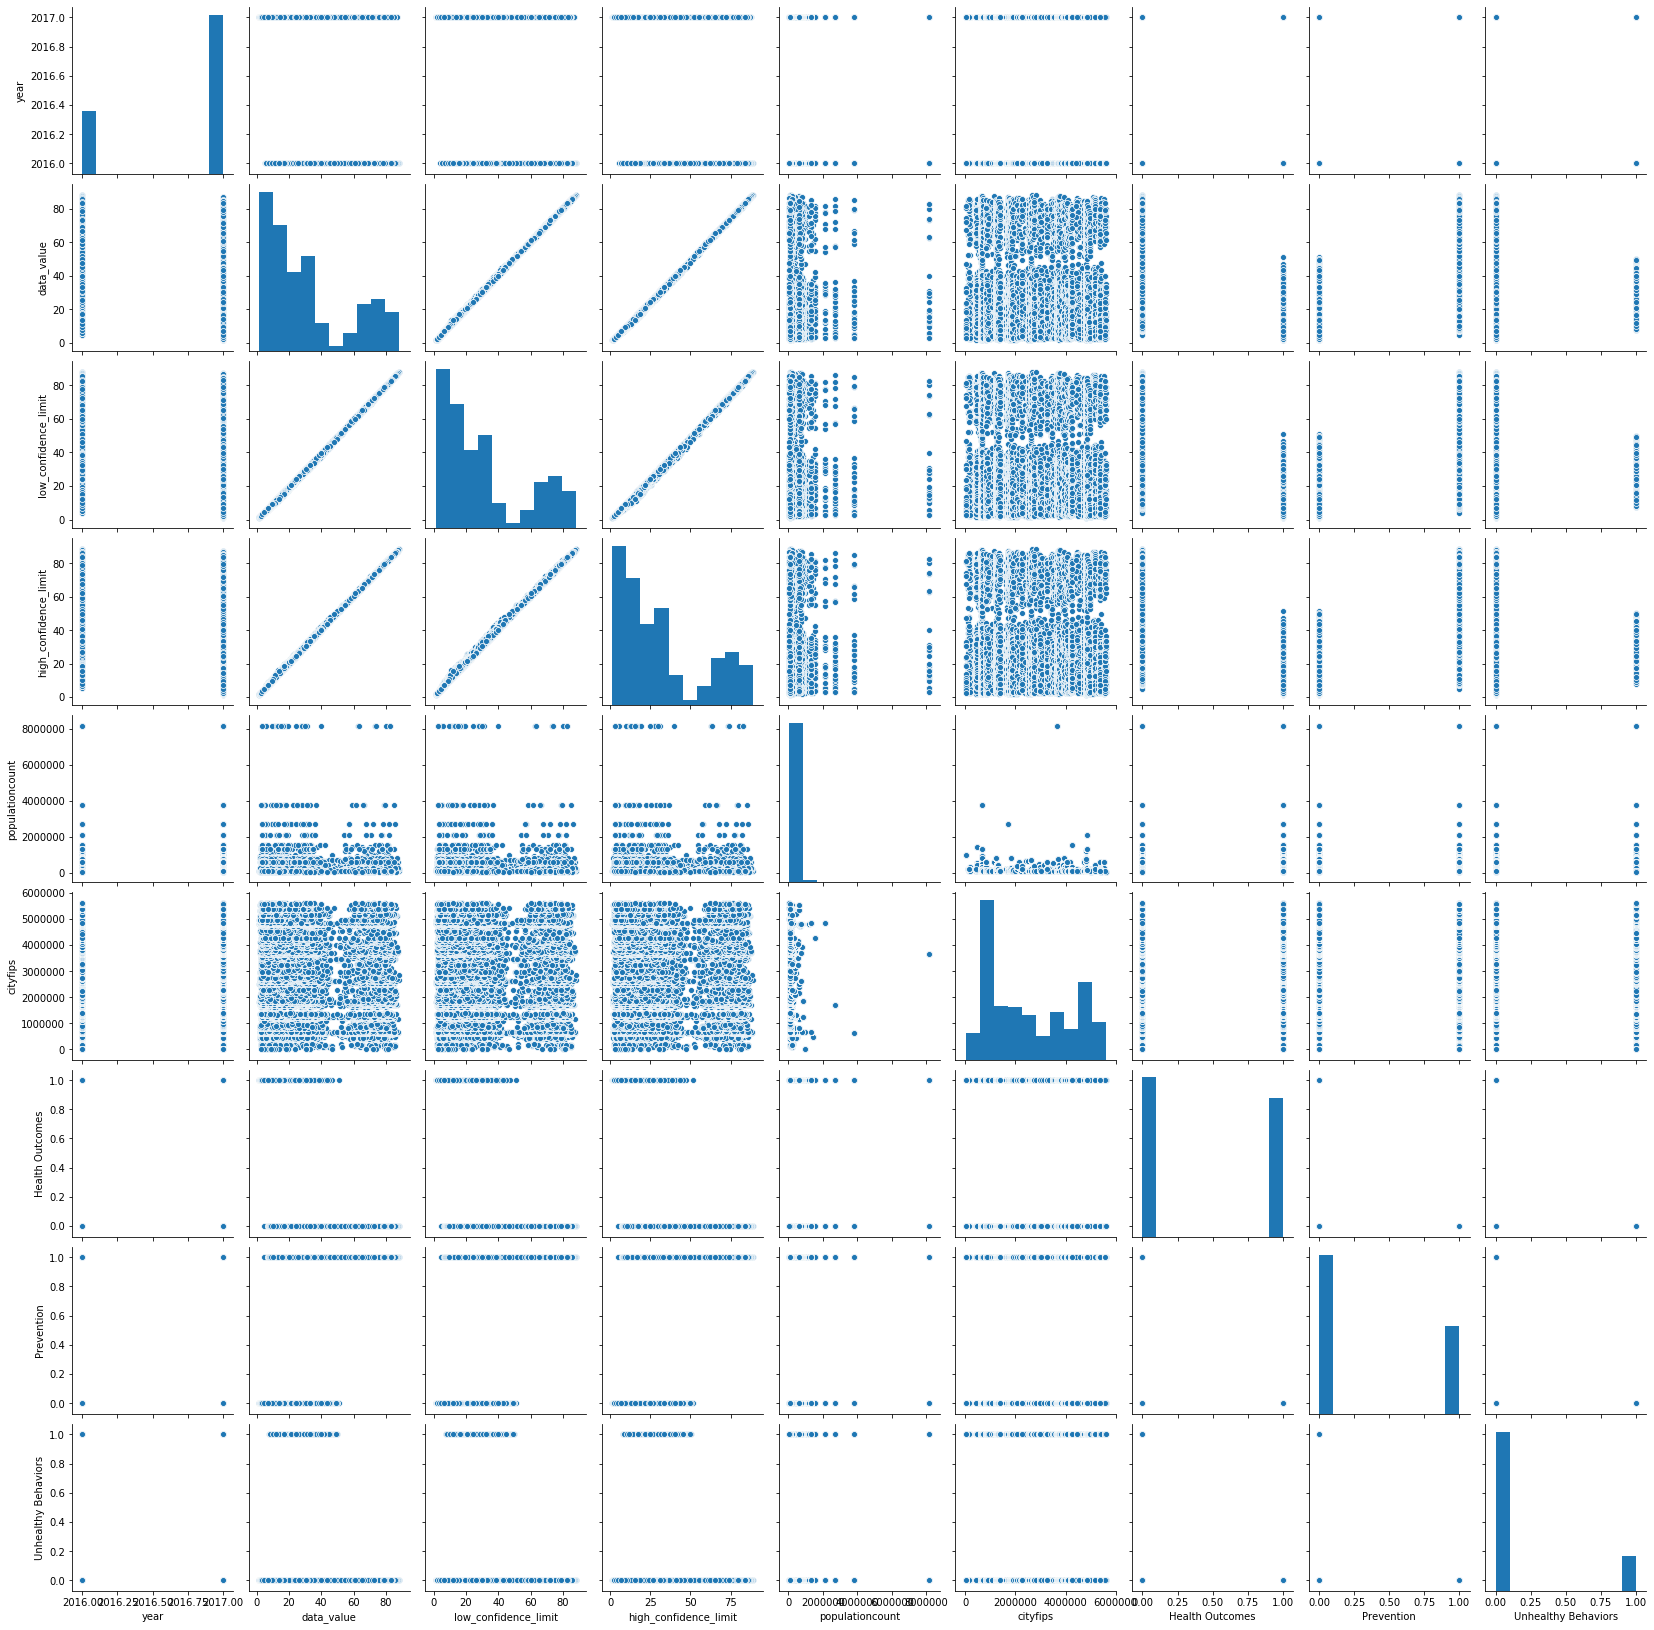

In [115]:
# First we will get the pair plot to see which variables are continuous
sns.pairplot(chronicdata_sub)
plt.show()